In [1]:
# Importing libraries 
import numpy as np 
import pandas as pd 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 

In [2]:
data= pd.read_csv('Training.csv').dropna(axis= 1)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


### For classification task is necessary to check whether our target column is balanced or not. I'll be check it by using "Bar Plot".

In [3]:
desease_counts= data['prognosis'].value_counts()

In [4]:
temp_df= pd.DataFrame({
    'Disease': desease_counts.index,
    'Counts': desease_counts.values})

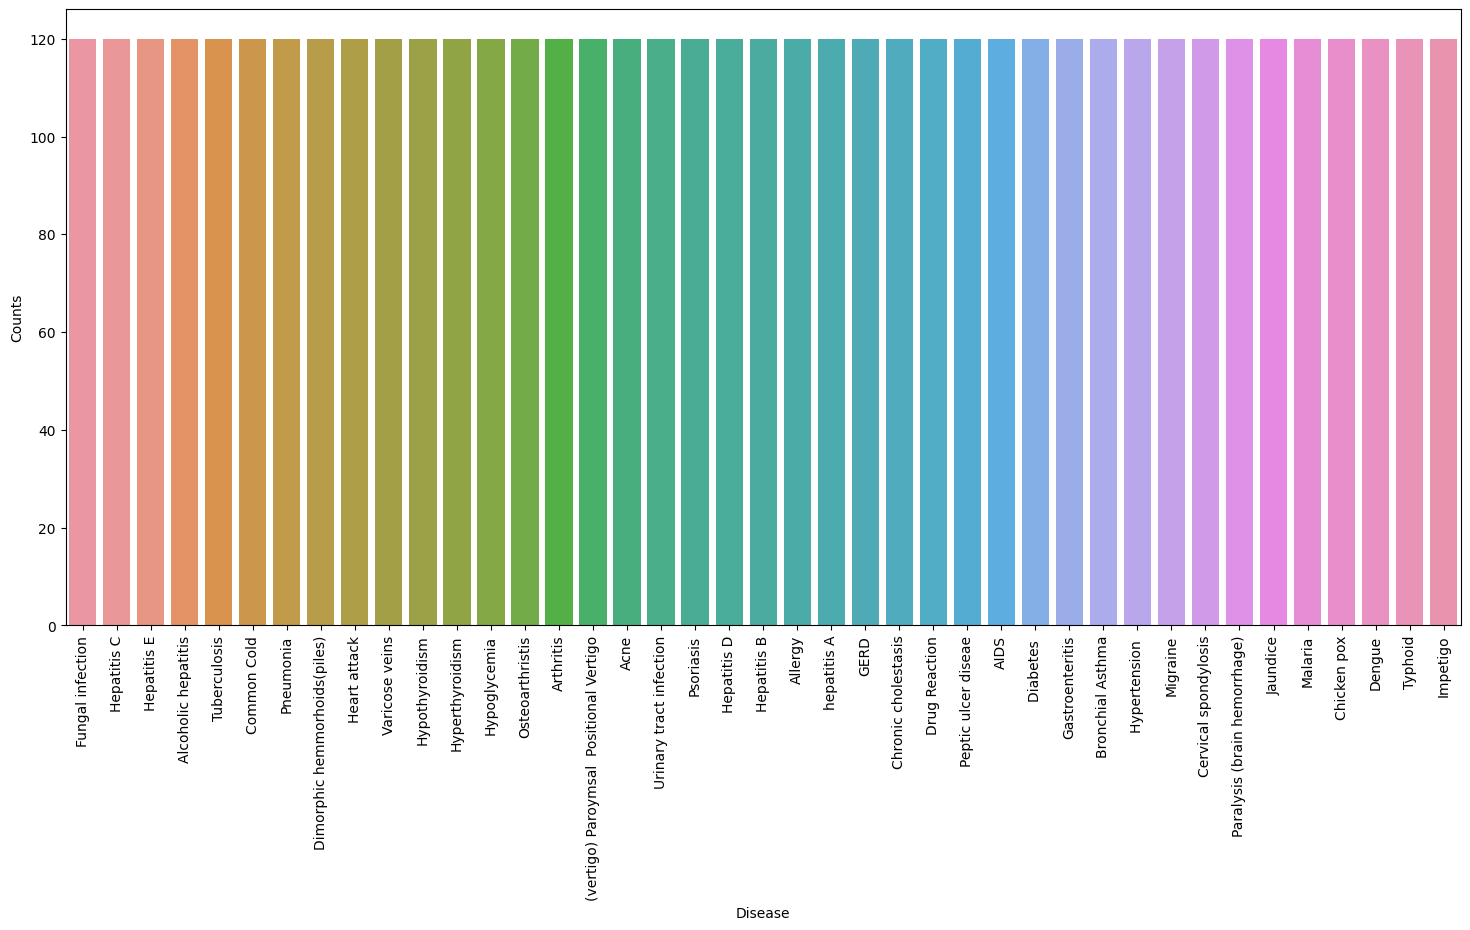

In [5]:
plt.figure(figsize= (18,8))
sns.barplot(x= 'Disease', y= 'Counts', data= temp_df)
plt.xticks(rotation= 90)
plt.show()

#### From the above plot, we can observe that the dataset is a balanced dataset.

In [6]:
temp_df.dtypes

Disease    object
Counts      int64
dtype: object

## I"ll be "Label Encoder" for convert the prognosis column to the numeriacal data types. 
##### Label Encoder converts the labels into numerical form by assigning a unique index to the labels. If the total number of labels is n, then the numbers assigned to each label will be between 0 to n-1.

- one-hot-encoding is another option

In [7]:
encoder= LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


## Splitting the data for training and testing the model.


In [8]:
X= data.iloc[:, :-1]
y= data.iloc[:, -1]

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 24)

In [9]:
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


## Model Building

In [10]:
# Defining scoring metric for k-fold cross validation 
def cv_scoring(estimator, X, y): 
    return accuracy_score(y, estimator.predict(X)) 

# Initializing Models 
models = { 
    "SVC":SVC(), 
    "Gaussian NB":GaussianNB(), 
    "Random Forest":RandomForestClassifier(random_state=18) 
} 

# Producing cross validation score for the models 
for model_name in models: 
    model = models[model_name] 
    scores = cross_val_score(model, X, y, cv = 10,  
                             n_jobs = -1,  
                             scoring = cv_scoring)
    
    print("=="*30)
    print(model_name) 
    print(f"Scores: {scores}") 
    print(f"Mean Score: {np.mean(scores)}")
    
    

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


### Building robust classifier by combining all model.
- Training and testing SVM classifier

Accuracy on train data by SVM classifier\ : 100.0
Accuracy on test data by SVM classifier\ : 100.0


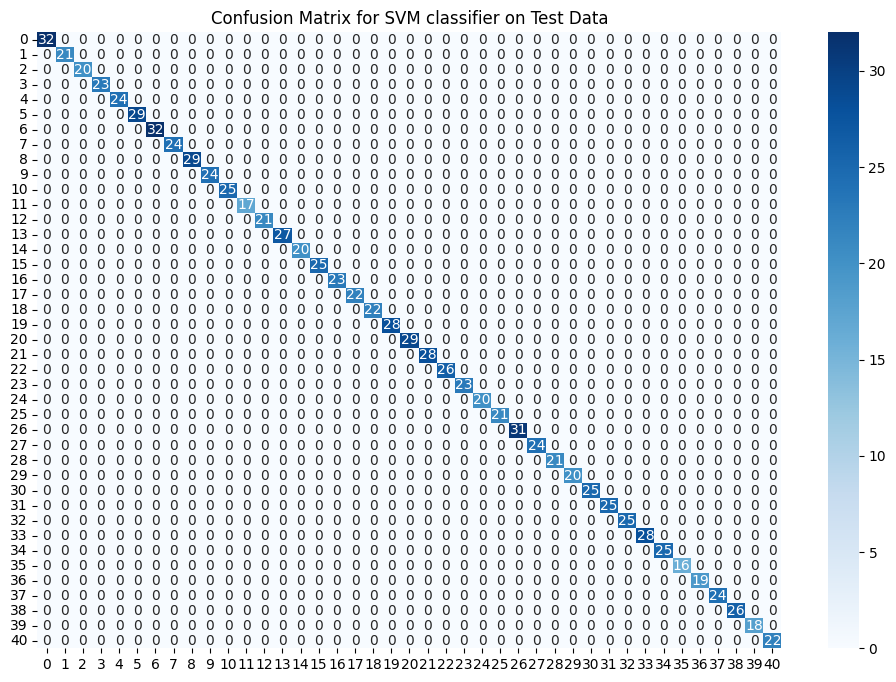

In [11]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds= svm_model.predict(X_test)

print(f'Accuracy on train data by SVM classifier\ : {accuracy_score(y_train, svm_model.predict(X_train)) * 100}')
print(f'Accuracy on test data by SVM classifier\ : {accuracy_score(y_test, preds) * 100}')

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize= (12,8))
sns.heatmap(cf_matrix, annot= True, cmap= 'Blues')
plt.title('Confusion Matrix for SVM classifier on Test Data')
plt.show()

## Training and Testing Naive Bayes Classifier

Accuracy on train data by Naive Bayes Classifiers\: 100.0
Accuracy on test data by Naive Bayes Classifiers\: 100.0


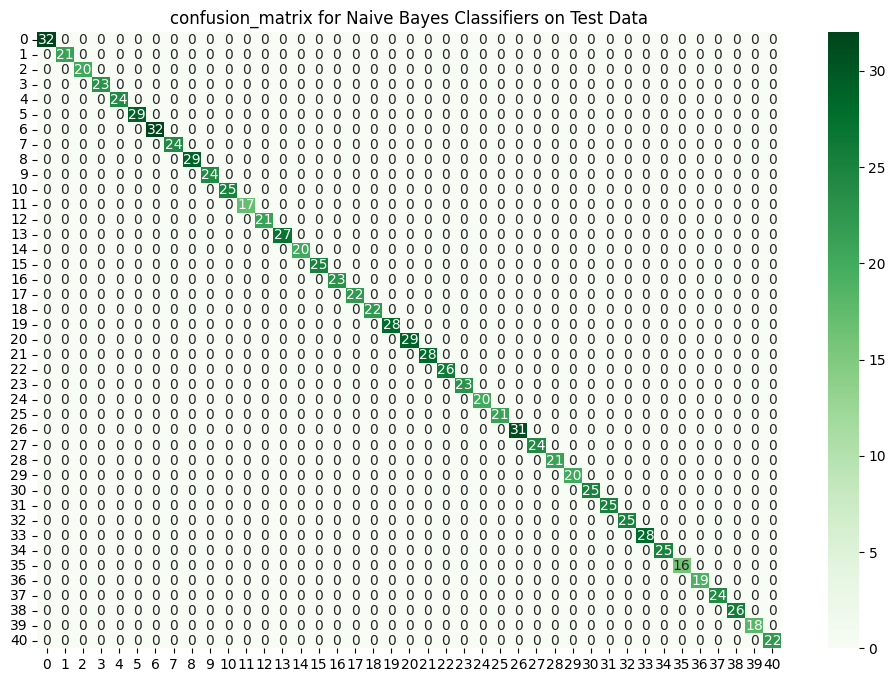

In [12]:
nb_model= GaussianNB()
nb_model.fit(X_train,y_train)
preds= nb_model.predict(X_test)
print(f'Accuracy on train data by Naive Bayes Classifiers\: {accuracy_score(y_train, nb_model.predict(X_train)) * 100}')

print(f'Accuracy on test data by Naive Bayes Classifiers\: {accuracy_score(y_test, preds) * 100}')

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize= (12, 8))
sns.heatmap(cf_matrix, annot= True, cmap= 'Greens')
plt.title('confusion_matrix for Naive Bayes Classifiers on Test Data')
plt.show()

## Training and Testing with Random Forest Classifiers

Accuracy on train data by Random Forest Classifiers\ : 100.0 
Accuracy on test data by Random Forest Classifiers\: 100.0


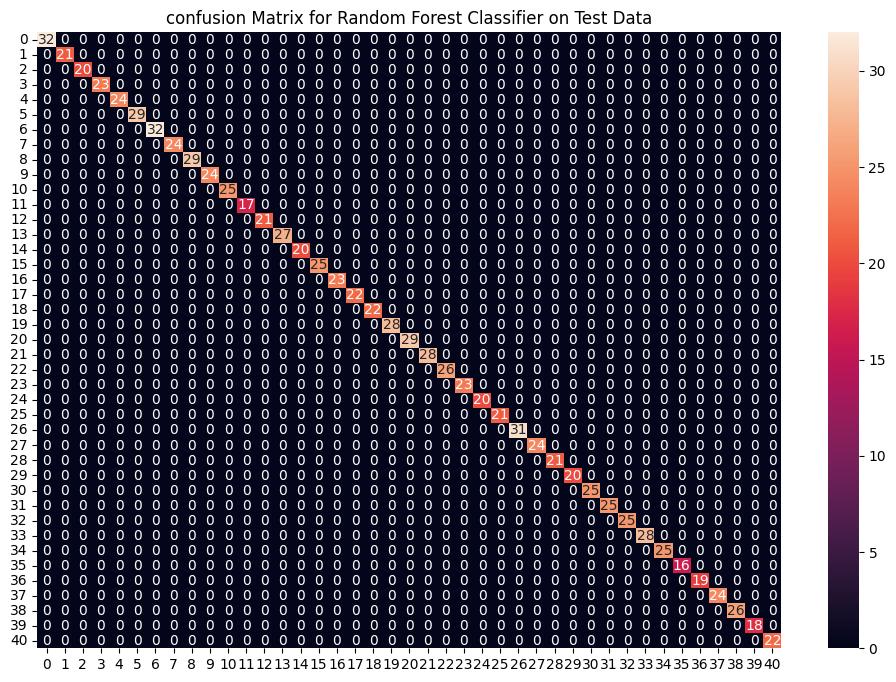

In [13]:
rf_model= RandomForestClassifier(random_state= 18)
rf_model.fit(X_train, y_train)
preds= rf_model.predict(X_test)
print(f'Accuracy on train data by Random Forest Classifiers\ : {accuracy_score(y_train, rf_model.predict(X_train)) * 100} ')
print(f'Accuracy on test data by Random Forest Classifiers\: {accuracy_score(y_test, preds) * 100}')

cf_matrix= confusion_matrix(y_test, preds)
plt.figure(figsize= (12, 8))
sns.heatmap(cf_matrix, annot= True)
plt.title('confusion Matrix for Random Forest Classifier on Test Data')
plt.show()


## Fitting the model on whole data and validation on the Test Dataset.

C:\Users\prabh\AppData\Local\Temp\ipykernel_7404\4111096598.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds= [mode([i,j,k])[0][0] for i, j, k


Accuracy on Test Dataset by combined model\: 100.0


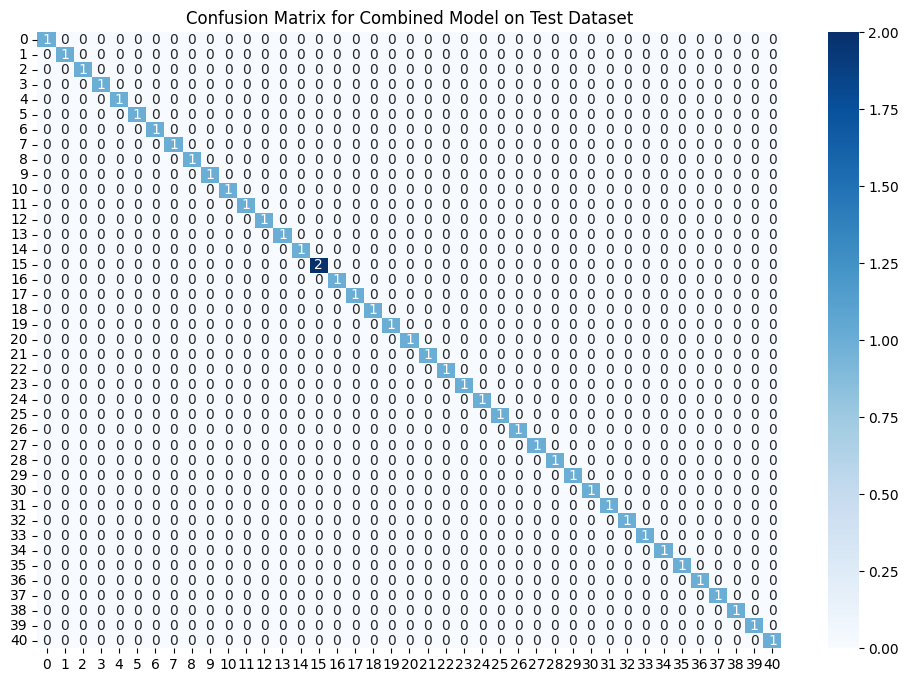

In [14]:
# Training the model on whole data.
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state= 18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)


# Reading the test data
test_data= pd.read_csv('Testing.csv').dropna(axis= 1)

test_X= test_data.iloc[:, :-1]
test_y= encoder.transform(test_data.iloc[:, -1])

# Making prediction by taking mode of prediction
svm_preds= final_svm_model.predict(test_X)
nb_preds= final_nb_model.predict(test_X)
rf_preds= final_rf_model.predict(test_X)

final_preds= [mode([i,j,k])[0][0] for i, j, k
              in zip(svm_preds, nb_preds, rf_preds)]

print(f'Accuracy on Test Dataset by combined model\: {accuracy_score(test_y, final_preds) * 100}')
cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize= (12, 8))
sns.heatmap(cf_matrix, annot= True, cmap= 'Blues')
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


### Creating a function that can take symptoms as input and generate prediction for desease.